# Analyze the Descriptions and scraped texts

In [1]:
from typing import List

import pandas as pd
from pandas import DataFrame
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("white")

mongo_client = MongoClient("127.0.0.1")

mongo_db = mongo_client["nvd"]
mongo_collection = mongo_db["nvd_all"]

## Length of descriptions

In [2]:
lengths = []
for doc in mongo_collection.aggregate([
    {

        '$unwind': {
            'path': '$description'
        }
    },
    {
        '$match': {
            'cvssv3': { "$nin": [ 'None', "" ] }
        }
    },
    {
        '$project': {
            'description': 1
        }
    }
]):
    lengths.append(len(doc['description']))

lengths[:10]

[163, 226, 205, 230, 217, 224, 221, 230, 230, 201]

In [3]:
print(f"NUM: {len(lengths)}")
print(f"AVG: {np.average(lengths)}")
print(f"MEDIAN: {np.median(lengths)}")
print(f"MIN: {np.min(lengths)}")
print(f"MAX: {np.max(lengths)}")
print(f"STD: {np.std(lengths)}")
print(f"SUM: {np.sum(lengths)}")

NUM: 88979
AVG: 310.150574854741
MEDIAN: 249.0
MIN: 23
MAX: 3835
STD: 225.19999392252103
SUM: 27596888


In [4]:
print(f"50th percentile: {np.percentile(lengths, 50)}")
print(f"75th percentile: {np.percentile(lengths, 75)}")
print(f"90th percentile: {np.percentile(lengths, 90)}")
print(f"95th percentile: {np.percentile(lengths, 95)}")
print(f"99th percentile: {np.percentile(lengths, 99)}")

50th percentile: 249.0
75th percentile: 361.0
90th percentile: 580.0
95th percentile: 746.0
99th percentile: 1118.0


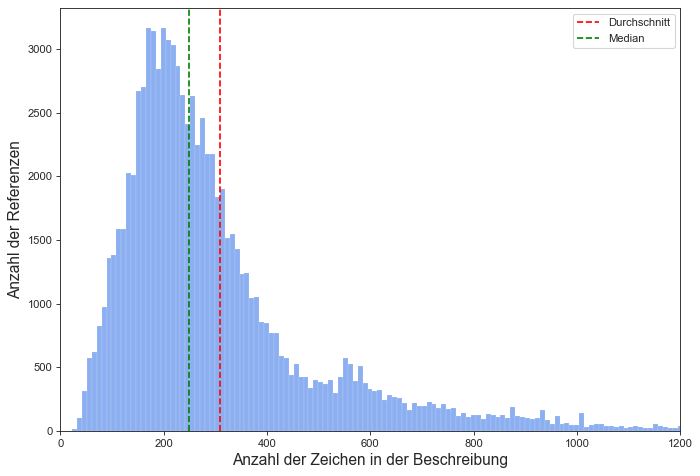

In [7]:
sns.set_style("ticks")
plt.figure(figsize=(10,7), dpi= 80)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
ax = sns.histplot(lengths, bins=400, color='cornflowerblue')
ax.set_xlim(0, 1200)
plt.xlabel('Anzahl der Zeichen in der Beschreibung', fontsize=14)
plt.ylabel('Anzahl der Referenzen', fontsize=14)
ax.axvline(x=np.average(lengths), color='red', linestyle='--', label='Durchschnitt')
ax.axvline(x=np.median(lengths), color='green', linestyle='--', label='Median')
ax.legend()
plt.savefig('../assets/nvd_reference_length_dist.png')
plt.show()

## Length of scraped references

In [8]:
scraped_lengths = []
for doc in mongo_collection.aggregate([
    {
        '$unwind': {
            'path': '$reference_data'
        }
    }, {
        '$replaceRoot': {
            'newRoot': {
                '$mergeObjects': [
                    '$$ROOT', '$reference_data'
                ]
            }
        }
    }, {
        '$match': {
            'text_selenium': {
                '$exists': True
            }
        }
    }, {
        '$match': {
            'cvssv3': { "$nin": [ 'None', "" ] }
        }
    }, {
        '$project': {
            'text_selenium': 1
        }
    }
]):
    scraped_lengths.append(len(doc['text_selenium']))

scraped_lengths[:10]

[444, 500, 479, 494, 481, 488, 485, 494, 494, 385]

In [9]:
print(f"NUM: {len(scraped_lengths)}")
print(f"AVG: {np.average(scraped_lengths)}")
print(f"MEDIAN: {np.median(scraped_lengths)}")
print(f"MIN: {np.min(scraped_lengths)}")
print(f"MAX: {np.max(scraped_lengths)}")
print(f"STD: {np.std(scraped_lengths)}")
print(f"SUM: {np.sum(scraped_lengths)}")

NUM: 12755
AVG: 817.1232457859663
MEDIAN: 532.0
MIN: 20
MAX: 32206
STD: 1517.4523935014008
SUM: 10422407


In [10]:
print(f"50th percentile: {np.percentile(scraped_lengths, 50)}")
print(f"75th percentile: {np.percentile(scraped_lengths, 75)}")
print(f"90th percentile: {np.percentile(scraped_lengths, 90)}")
print(f"95th percentile: {np.percentile(scraped_lengths, 95)}")
print(f"99th percentile: {np.percentile(scraped_lengths, 99)}")

50th percentile: 532.0
75th percentile: 728.0
90th percentile: 1499.0
95th percentile: 2906.2999999999993
99th percentile: 5632.859999999964


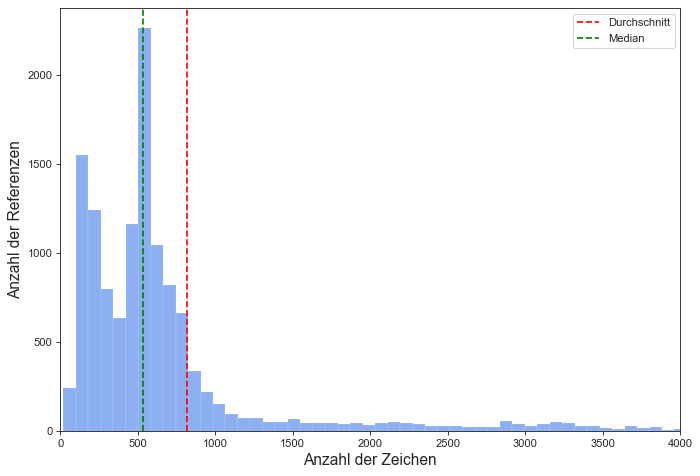

In [11]:
sns.set_style("ticks")
plt.figure(figsize=(10,7), dpi= 80)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
ax = sns.histplot(scraped_lengths, bins=400, color='cornflowerblue')
ax.set_xlim(0, 4000)
plt.xlabel('Anzahl der Zeichen', fontsize=14)
plt.ylabel('Anzahl der Referenzen', fontsize=14)
ax.axvline(x=np.average(scraped_lengths), color='red', linestyle='--', label='Durchschnitt')
ax.axvline(x=np.median(scraped_lengths), color='green', linestyle='--', label='Median')
ax.legend()
plt.savefig('../assets/scraped_text_length_dist.png')
plt.show()

## Number of references per vulnerability

In [13]:
ref_counts = []
for ref_count in mongo_collection.aggregate([
    {
        '$match': {
            'cvssv3': { "$nin": [ 'None', "" ] }
        }
    },
    {
        '$project': {
            'count': {
                '$size': '$reference_data'
            }
        }
    }
]):
    ref_counts.append(ref_count['count'])
ref_counts[:10]

[1, 5, 2, 2, 2, 2, 2, 2, 2, 2]

In [14]:
print(f"NUM: {len(ref_counts)}")
print(f"AVG: {np.average(ref_counts)}")
print(f"MEDIAN: {np.median(ref_counts)}")
print(f"MIN: {np.min(ref_counts)}({ref_counts.count(np.min(ref_counts))})")
print(f"MAX: {np.max(ref_counts)}({ref_counts.count(np.max(ref_counts))})")
print(f"STD: {np.std(ref_counts)}")
print(f"SUM: {np.sum(ref_counts)}")

NUM: 88979
AVG: 2.8263410467638432
MEDIAN: 2.0
MIN: 0(1)
MAX: 147(1)
STD: 3.6174536752623383
SUM: 251485


In [15]:
print(len([r for r in ref_counts if r >= 50]))

60


In [16]:
print(f"50th percentile: {np.percentile(ref_counts, 50)}")
print(f"75th percentile: {np.percentile(ref_counts, 75)}")
print(f"90th percentile: {np.percentile(ref_counts, 90)}")
print(f"95th percentile: {np.percentile(ref_counts, 95)}")
print(f"99th percentile: {np.percentile(ref_counts, 99)}")

50th percentile: 2.0
75th percentile: 3.0
90th percentile: 6.0
95th percentile: 8.0
99th percentile: 17.0


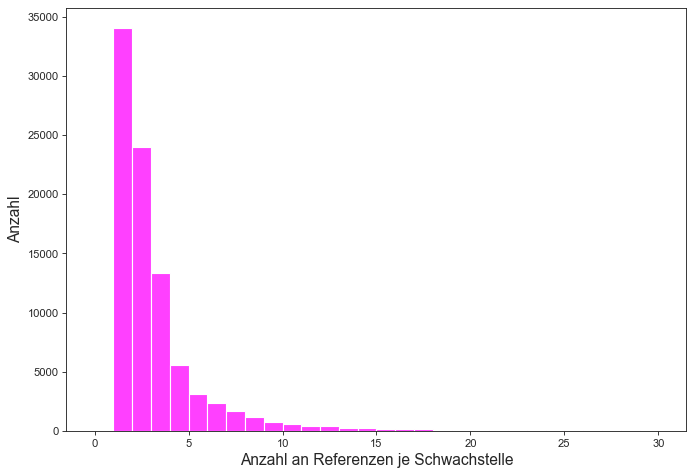

In [18]:
sns.set_style("ticks")
plt.figure(figsize=(10,7), dpi= 80)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
filtered = [i for i in ref_counts if i <= 30]
ax = sns.histplot(filtered, color='fuchsia', fill=True, binwidth=1, bins=60, )
# ax.set_xlim(0, 20)
plt.xlabel('Anzahl an Referenzen je Schwachstelle', fontsize=14)
plt.ylabel('Anzahl', fontsize=14)
plt.savefig('../assets/num_of_refs_dist.png')
plt.show()